# Project 1

## Step 1: Load the data and perform basic operations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
from scipy.stats import stats

##### 1. Load the data in using pandas.

In [2]:
act = pd.read_csv("../data/act.csv")
sat = pd.read_csv("../data/sat.csv")

##### 2. Print the first ten rows of each dataframe.

In [3]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [4]:
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

We are given data about state-wide ACT and SAT scores, including the statewide participation rate.<br><br>
<b>The columns for each are as follows:</b><br>
- "Unnamed:0" - unique identifier
- "State" - State name
- "Participation" - what percentage of high school seniors took the exam<br>

<b>ACT columns:</b><br>

- "English" - the statewide average score on the English section of the ACT
- "Math" - the statewide average score on the Math section of the ACT
- "Reading" - the statewide average score on the Reading section of the ACT
- "Science" the statewide average score on the Science section of the ACT
- "Composite" - each exam taker's nomial ACT score is refered to as their composite. Composites are the average of the three sections on the ACT. This column represents the statewide average score on the ACT.<br>

<b>SAT columns:</b><br>

- "Evidence-Based Reading and Writing" - the statewide average score on the Reading/Writing section of the SAT
- "Math" - the statewide average score on the Math section of the SAT
- "Total" - each exam taker's nomial SAT score is the sum of the scores on the two sections. This column represents the statewide average score on the SAT.<br><br>

<b>Limitations:</b>
- Notice that the SAT data does not contain a row with the national averages, therefore Unique Identifiers will not align in the datasets. We will need to merge  by State if we choose to do so.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

Checks completed for ACT and SAT datasets
- Duplicates
- Unreasonable values
  * Any mean values that exceed the maximum possible value
  * Range of subject scores are not extreme for any one state 
  * Any extreme differences between the calculated Composite or Total and the one given in the data 

### ACT data

In [5]:
sum(act.duplicated())

0

In [6]:
# Here we will see the max and min of each column
# We want to make sure no maximum exceeds 36, the maximum score on the ACT
act[["English", "Math", "Reading", "Science"]].describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


In [7]:
# Here we will strip the percentage sign from the "Participation" column 
# So we can later sort and determine that its max and min are reasonable.

In [8]:
act["Participation"] = act.apply(lambda x: int(x["Participation"].replace("%","")), axis =1)

In [9]:
act["Participation"].describe()

count     52.000000
mean      65.153846
std       31.832518
min        8.000000
25%       31.000000
50%       68.000000
75%      100.000000
max      100.000000
Name: Participation, dtype: float64

In [10]:
act.sort_values("Participation").head(5)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
20,20,Maine,8,24.2,24.0,24.8,23.7,24.3
30,30,New Hampshire,18,25.4,25.1,26.0,24.9,25.5
8,8,Delaware,18,24.1,23.4,24.8,23.6,24.1
40,40,Rhode Island,21,24.0,23.3,24.7,23.4,24.0
39,39,Pennsylvania,23,23.4,23.4,24.2,23.3,23.7


In [11]:
# As the source blog indicates, Maine has the lowest participation rate in the ACT. 
# This indicates that the SAT is the dominant exam in that part of the country.

In [12]:
# Create column that calculates range of subject scores
def a_range(alist):
    a = max(alist)
    b = min(alist)
    return a-b

In [13]:
act['score_range'] = act.apply(lambda x: a_range([x["English"],x["Math"],x["Reading"],x["Science"]]), axis=1)

In [14]:
act["score_range"].value_counts()

1.2    6
1.6    5
1.3    4
1.0    4
1.4    4
1.1    4
0.8    3
0.9    3
1.1    3
1.8    2
1.4    2
2.0    2
1.5    2
0.6    1
1.9    1
0.9    1
0.7    1
1.8    1
1.7    1
1.3    1
1.2    1
Name: score_range, dtype: int64

In [15]:
# There are no outrageous differences between the maximum and minimum scores per state, they are reasonable. 
# We can assume there aren't any erroneous outlier values.

In [16]:
# Create column to make sure Composites are reasonable.
act['checkcol'] = act.apply(lambda x: np.mean([x["English"],x["Math"], x["Reading"], x["Science"]]), axis=1)

In [17]:
act["diff_check"] = act.apply(lambda x: x["Composite"]-x["checkcol"], axis =1)

In [18]:
act["diff_check"].value_counts()

0.100    9
0.125    9
0.150    7
0.100    7
0.175    5
0.125    4
0.175    4
0.075    2
0.125    2
0.050    1
0.150    1
0.075    1
Name: diff_check, dtype: int64

In [19]:
# Here we see that there's slight differences between the Composite and true average of the scores. 
# Perhaps there is a weighting in its calculation we do not know about. It is not provided from the source site.

### SAT data

In [20]:
sat.head()

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055


In [21]:
sum(sat.duplicated())

0

In [22]:
# Here we will see the max and min of each column
# We want to make sure no score maximum exceeds 800, the maximum score on a single section of the SAT
# Also, we're going to see that no Total exceeds 1600
sat[["Evidence-Based Reading and Writing", "Math", "Total"]].describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [23]:
# Nothing looks out of line, everything looks reasonable.

In [24]:
# I think the "Evidence-Based Reading and Writing" column name is too long to type over and over. 
# We're going to change its name to "ReadingWriting".

In [25]:
sat = sat.rename(columns={'Evidence-Based Reading and Writing': 'ReadingWriting'})

In [26]:
# Here we will strip the percentage sign from the "Participation" column 
# So we can later sort and determine that its max and min are reasonable.

In [27]:
sat["Participation"] = sat.apply(lambda x: int(x["Participation"].replace("%","")), axis =1)

In [28]:
sat["Participation"].describe()

count     51.000000
mean      39.803922
std       35.276632
min        2.000000
25%        4.000000
50%       38.000000
75%       66.000000
max      100.000000
Name: Participation, dtype: float64

In [29]:
sat.sort_values("Participation").head(5)

,Unnamed: 0,State,Participation,ReadingWriting,Math,Total
34,34,North Dakota,2,635,621,1256
24,24,Mississippi,2,634,607,1242
15,15,Iowa,2,641,635,1275
25,25,Missouri,3,640,631,1271
44,44,Utah,3,624,614,1238


In [30]:
# Wow, there are some very low SAT participation percentages. 
# Perhaps this means the dominant exam in those states is the ACT.

In [31]:
sat['score_range'] = sat.apply(lambda x: a_range([x["ReadingWriting"],x["Math"]]), axis=1)

In [32]:
sat["score_range"].value_counts()

14    6
4     4
7     4
20    4
10    4
11    4
9     3
12    3
15    2
6     2
3     2
22    2
27    1
13    1
16    1
18    1
19    1
21    1
8     1
23    1
5     1
25    1
30    1
Name: score_range, dtype: int64

In [33]:
# These are reasonable ranges between state-wide average SAT section scores. 
# We can assume there are no erroneous outlier values.

In [34]:
# Create column to make sure Composites are reasonable.
sat['checkcol'] = sat.apply(lambda x: np.sum([x["ReadingWriting"],x["Math"]]), axis=1)

In [35]:
sat["diff_check"] = sat.apply(lambda x: x["Total"]-x["checkcol"], axis =1)

In [36]:
act["diff_check"].value_counts()

0.100    9
0.125    9
0.150    7
0.100    7
0.175    5
0.125    4
0.175    4
0.075    2
0.125    2
0.050    1
0.150    1
0.075    1
Name: diff_check, dtype: int64

In [37]:
# Here we see that there's slight differences between the Total and true sum of the scores. 
# Perhaps there is a weighting in its calculation we do not know about. It is not provided from the source site.

##### 5. Print the types of each column.

In [38]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null int64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
score_range      52 non-null float64
checkcol         52 non-null float64
diff_check       52 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 4.5+ KB


In [39]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
Unnamed: 0        51 non-null int64
State             51 non-null object
Participation     51 non-null int64
ReadingWriting    51 non-null int64
Math              51 non-null int64
Total             51 non-null int64
score_range       51 non-null int64
checkcol          51 non-null int64
diff_check        51 non-null int64
dtypes: int64(8), object(1)
memory usage: 3.7+ KB


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [40]:
# Previously in my data reasonability tests I removed the percentage sign and changed "Participation" 
# to integer (from object) in both tables. I already had the foresight to do this.

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

### ACT dictionaries

In [41]:
act_part = {}
for i in range(len(act)):
    act_part[act["State"][i]] = act["Participation"][i]

In [42]:
act_eng = {}
for i in range(len(act)):
    act_eng[act["State"][i]] = act["English"][i]

In [43]:
act_math ={}
for i in range(len(act)):
    act_math[act["State"][i]] = act["Math"][i]

In [44]:
act_read = {}
for i in range(len(act)):
    act_read[act["State"][i]] = act["Reading"][i]

In [45]:
act_sci = {}
for i in range(len(act)):
    act_sci[act["State"][i]] = act["Science"][i]

### SAT dictionaries

In [46]:
sat_part ={}
for i in range(len(sat)):
    sat_part[sat["State"][i]] = sat["Participation"][i]

In [47]:
sat_rdwt ={}
for i in range(len(sat)):
    sat_rdwt[sat["State"][i]] = sat["ReadingWriting"][i]

In [48]:
sat_math={}
for i in range(len(sat)):
    sat_math[sat["State"][i]] = sat["Math"][i]

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

### ACT dictionaries long

In [49]:
act_dict_long = {}
cols =["State", "Participation", "English", "Math", "Reading", "Science"]
for j in cols:
    a_list=[]
    for i in range(len(act)):
        a_list.append(act[j][i])
        act_dict_long[j] = a_list

In [50]:
act_dict_long

{'English': [20.300000000000001,
  18.899999999999999,
  18.699999999999999,
  18.600000000000001,
  18.899999999999999,
  22.5,
  20.100000000000001,
  25.5,
  24.100000000000001,
  24.399999999999999,
  19.0,
  21.0,
  17.800000000000001,
  21.899999999999999,
  21.0,
  22.0,
  21.199999999999999,
  21.100000000000001,
  19.600000000000001,
  19.399999999999999,
  24.199999999999999,
  23.300000000000001,
  25.399999999999999,
  24.100000000000001,
  20.399999999999999,
  18.199999999999999,
  19.800000000000001,
  19.0,
  20.899999999999999,
  16.300000000000001,
  25.399999999999999,
  23.800000000000001,
  18.600000000000001,
  23.800000000000001,
  17.800000000000001,
  19.0,
  21.199999999999999,
  18.5,
  21.199999999999999,
  23.399999999999999,
  24.0,
  17.5,
  20.699999999999999,
  19.5,
  19.5,
  19.5,
  23.300000000000001,
  23.5,
  20.899999999999999,
  20.0,
  19.699999999999999,
  19.399999999999999],
 'Math': [20.699999999999999,
  18.399999999999999,
  19.80000000000

### SAT dictionaries long

In [51]:
sat_dict_long = {}
cols =["State", "Participation", "ReadingWriting", "Math"]
for j in cols:
    a_list=[]
    for i in range(len(sat)):
        a_list.append(sat[j][i])
        sat_dict_long[j] = a_list

In [52]:
sat_dict_long

{'Math': [572,
  533,
  553,
  594,
  524,
  595,
  512,
  492,
  468,
  497,
  515,
  541,
  493,
  556,
  532,
  635,
  628,
  616,
  586,
  499,
  524,
  551,
  495,
  651,
  607,
  631,
  591,
  625,
  553,
  520,
  526,
  561,
  523,
  535,
  621,
  570,
  517,
  548,
  531,
  524,
  521,
  603,
  604,
  507,
  614,
  551,
  541,
  534,
  528,
  649,
  604],
 'Participation': [5,
  38,
  30,
  3,
  53,
  11,
  100,
  100,
  100,
  83,
  61,
  55,
  93,
  9,
  63,
  2,
  4,
  4,
  4,
  95,
  69,
  76,
  100,
  3,
  2,
  3,
  10,
  3,
  26,
  96,
  70,
  11,
  67,
  49,
  2,
  12,
  7,
  43,
  65,
  71,
  50,
  3,
  5,
  62,
  3,
  60,
  65,
  64,
  14,
  3,
  3],
 'ReadingWriting': [593,
  547,
  563,
  614,
  531,
  606,
  530,
  503,
  482,
  520,
  535,
  544,
  513,
  559,
  542,
  641,
  632,
  631,
  611,
  513,
  536,
  555,
  509,
  644,
  634,
  640,
  605,
  629,
  563,
  532,
  530,
  577,
  528,
  546,
  635,
  578,
  530,
  560,
  540,
  539,
  543,
  612,
  623,
  513

##### 9. Merge the dataframes on the state column.

In [53]:
#Before we merge data frames, I'm going to do some serious column renames.
act = act.rename(columns={"State":"state",'Participation': 'partic-act', 'English':"eng-act", "Math":"math-act", 
                          "Reading":"read-act", "Science":"sci-act", "Composite":"comp-act", 
                          "score_range":"score-range-act","checkcol":"checkcol-act", "diff_check":"diff-check-act"})
sat = sat.rename(columns={"State":"state","Participation":"partic-sat", "ReadingWriting":"readwrite-sat", 
                          "Math":"math-sat", "Total":"total-sat", "score_range":"score-range-sat", "checkcol":"checkcol-sat", "diff_chec":"diff-check-sat"})

In [54]:
sat_act = pd.merge(act, sat, on = "state", how = "outer")

In [55]:
sat_act.head()

,Unnamed: 0_x,state,partic-act,eng-act,math-act,read-act,sci-act,comp-act,score-range-act,checkcol-act,diff-check-act,Unnamed: 0_y,partic-sat,readwrite-sat,math-sat,total-sat,score-range-sat,checkcol-sat,diff_check
0,0,National,60,20.3,20.7,21.4,21.0,21.0,1.1,20.850,0.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Alabama,100,18.9,18.4,19.7,19.4,19.2,1.3,19.100,0.100,0.0,5.0,593.0,572.0,1165.0,21.0,1165.0,0.0
2,2,Alaska,65,18.7,19.8,20.4,19.9,19.8,1.7,19.700,0.100,1.0,38.0,547.0,533.0,1080.0,14.0,1080.0,0.0
3,3,Arizona,62,18.6,19.8,20.1,19.8,19.7,1.5,19.575,0.125,2.0,30.0,563.0,553.0,1116.0,10.0,1116.0,0.0
4,4,Arkansas,100,18.9,19.0,19.7,19.5,19.4,0.8,19.275,0.125,3.0,3.0,614.0,594.0,1208.0,20.0,1208.0,0.0


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [56]:
# I already had the foresight to do this.

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [57]:
# I am choosing to show this in two ways in case one is visibly easier to read despite providing 
# more information than what was asked.

In [58]:
num_sat_act = sat_act[["state","partic-act", 'eng-act', 'math-act', 'read-act','sci-act','comp-act','score-range-act', 'partic-sat',
                              'readwrite-sat','math-sat','total-sat', 'score-range-sat']]

In [59]:
num_sat_act.head()

,state,partic-act,eng-act,math-act,read-act,sci-act,comp-act,score-range-act,partic-sat,readwrite-sat,math-sat,total-sat,score-range-sat
0,National,60,20.3,20.7,21.4,21.0,21.0,1.1,NaN,NaN,NaN,NaN,NaN
1,Alabama,100,18.9,18.4,19.7,19.4,19.2,1.3,5.0,593.0,572.0,1165.0,21.0
2,Alaska,65,18.7,19.8,20.4,19.9,19.8,1.7,38.0,547.0,533.0,1080.0,14.0
3,Arizona,62,18.6,19.8,20.1,19.8,19.7,1.5,30.0,563.0,553.0,1116.0,10.0
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4,0.8,3.0,614.0,594.0,1208.0,20.0


In [60]:
#remove national average for act, to remove null values
num_sat_act = num_sat_act[1:]

In [61]:
len(num_sat_act.columns[0])

5

In [62]:
num_sat_act.head()

,state,partic-act,eng-act,math-act,read-act,sci-act,comp-act,score-range-act,partic-sat,readwrite-sat,math-sat,total-sat,score-range-sat
1,Alabama,100,18.9,18.4,19.7,19.4,19.2,1.3,5.0,593.0,572.0,1165.0,21.0
2,Alaska,65,18.7,19.8,20.4,19.9,19.8,1.7,38.0,547.0,533.0,1080.0,14.0
3,Arizona,62,18.6,19.8,20.1,19.8,19.7,1.5,30.0,563.0,553.0,1116.0,10.0
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4,0.8,3.0,614.0,594.0,1208.0,20.0
5,California,31,22.5,22.7,23.1,22.2,22.8,0.9,53.0,531.0,524.0,1055.0,7.0


In [63]:
num_sat_act.columns

Index(['state', 'partic-act', 'eng-act', 'math-act', 'read-act', 'sci-act',
       'comp-act', 'score-range-act', 'partic-sat', 'readwrite-sat',
       'math-sat', 'total-sat', 'score-range-sat'],
      dtype='object')

In [64]:
len(num_sat_act["partic-act"])

51

In [65]:
num_sat_act["partic-act"][1]

100

In [66]:
min_max ={}
for col in num_sat_act.columns[1:]:
    a_list=[]
    for i in range(1, len(num_sat_act[col])): #we need to start at 1 - we've removed index 0, the national average for act scores
        a_list.append(num_sat_act[col][i])
        min_max[col] = "Max: "+str(max(a_list))+", Min: "+str(min(a_list))

In [67]:
min_max

{'comp-act': 'Max: 25.5, Min: 17.8',
 'eng-act': 'Max: 25.5, Min: 16.3',
 'math-act': 'Max: 25.3, Min: 18.0',
 'math-sat': 'Max: 651.0, Min: 468.0',
 'partic-act': 'Max: 100, Min: 8',
 'partic-sat': 'Max: 100.0, Min: 2.0',
 'read-act': 'Max: 26.0, Min: 18.1',
 'readwrite-sat': 'Max: 644.0, Min: 482.0',
 'sci-act': 'Max: 24.9, Min: 18.2',
 'score-range-act': 'Max: 2.0, Min: 0.6',
 'score-range-sat': 'Max: 30.0, Min: 3.0',
 'total-sat': 'Max: 1295.0, Min: 950.0'}

In [68]:
desc_dict = {}
desc_dict["field"] = list(num_sat_act.columns[1:])

In [69]:
min_list =[]
max_list=[]
for col in num_sat_act.columns[1:]:
    b_list = []
    for i in range(1,len(num_sat_act)):
        b_list.append(num_sat_act[col][i])
    minimum = min(b_list)
    maximum = max(b_list)
    min_list.append(minimum)
    max_list.append(maximum)

In [70]:
desc_dict["min"] = min_list
desc_dict["max"] = max_list

In [71]:
desc_dict

{'field': ['partic-act',
  'eng-act',
  'math-act',
  'read-act',
  'sci-act',
  'comp-act',
  'score-range-act',
  'partic-sat',
  'readwrite-sat',
  'math-sat',
  'total-sat',
  'score-range-sat'],
 'max': [100,
  25.5,
  25.300000000000001,
  26.0,
  24.899999999999999,
  25.5,
  2.0,
  100.0,
  644.0,
  651.0,
  1295.0,
  30.0],
 'min': [8,
  16.300000000000001,
  18.0,
  18.100000000000001,
  18.199999999999999,
  17.800000000000001,
  0.60000000000000142,
  2.0,
  482.0,
  468.0,
  950.0,
  3.0]}

In [72]:
desc_df=pd.DataFrame(desc_dict)
desc_df

,field,max,min
0,partic-act,100.0,8.0
1,eng-act,25.5,16.3
2,math-act,25.3,18.0
3,read-act,26.0,18.1
4,sci-act,24.9,18.2
5,comp-act,25.5,17.8
6,score-range-act,2.0,0.6
7,partic-sat,100.0,2.0
8,readwrite-sat,644.0,482.0
9,math-sat,651.0,468.0


In [73]:
num_sat_act.describe()

,partic-act,eng-act,math-act,read-act,sci-act,comp-act,score-range-act,partic-sat,readwrite-sat,math-sat,total-sat,score-range-sat
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,1.278431,39.803922,569.117647,556.882353,1126.098039,12.784314
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,0.338416,35.276632,45.666901,47.121395,92.494812,6.619105
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,0.600000,2.000000,482.000000,468.000000,950.000000,3.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,1.050000,4.000000,533.500000,523.500000,1055.500000,7.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,1.200000,38.000000,559.000000,548.000000,1107.000000,12.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,1.500000,66.000000,613.000000,599.000000,1212.000000,17.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,2.000000,100.000000,644.000000,651.000000,1295.000000,30.000000


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [74]:
def fsd(col, table): #used "fsd" for function of standard deviation
    xmu = [(x-np.mean(table[col]))**2 for x in table[col]]
    return ((sum(xmu)/len(xmu))**.5)

In [75]:
sd = [fsd(x, num_sat_act) for x in num_sat_act.columns[1:]]

In [76]:
sd

[31.824175751231806,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 1.7222161451443676,
 2.0007860815819889,
 0.33508191886327798,
 34.929070766645083,
 45.216970204378661,
 46.65713364485503,
 91.583510567787428,
 6.5538904042551769]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [77]:
# I already had the foresight to display this with .describe(). 

# The standard deviation values I calculated are slightly different than 
# the ones calculated in .describe(). .describe() must use the formula 
# for the standard deviation of a sample (versus entire population).

# I will do so again, guessing at the assignment's requested methodology. 

In [78]:
# We will append this observation to our Descriptive Statistics DataFrame, desc_df
desc_dict["sd"] = sd

In [79]:
desc_df=pd.DataFrame(desc_dict)

In [80]:
desc_df

,field,max,min,sd
0,partic-act,100.0,8.0,31.824176
1,eng-act,25.5,16.3,2.330488
2,math-act,25.3,18.0,1.962462
3,read-act,26.0,18.1,2.046903
4,sci-act,24.9,18.2,1.722216
5,comp-act,25.5,17.8,2.000786
6,score-range-act,2.0,0.6,0.335082
7,partic-sat,100.0,2.0,34.929071
8,readwrite-sat,644.0,482.0,45.216970
9,math-sat,651.0,468.0,46.657134


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [81]:
# The prompt appears to switch back to the dataframe containing numerical values for each state.
num_sat_act.sort_values("partic-act", ascending = False)

,state,partic-act,eng-act,math-act,read-act,sci-act,comp-act,score-range-act,partic-sat,readwrite-sat,math-sat,total-sat,score-range-sat
1,Alabama,100,18.9,18.4,19.7,19.4,19.2,1.3,5.0,593.0,572.0,1165.0,21.0
18,Kentucky,100,19.6,19.4,20.5,20.1,20.0,1.1,4.0,631.0,616.0,1247.0,15.0
50,Wisconsin,100,19.7,20.4,20.6,20.9,20.5,1.2,3.0,642.0,649.0,1291.0,7.0
45,Utah,100,19.5,19.9,20.8,20.6,20.3,1.3,3.0,624.0,614.0,1238.0,10.0
43,Tennessee,100,19.5,19.2,20.1,19.9,19.8,0.9,5.0,623.0,604.0,1228.0,19.0
41,South Carolina,100,17.5,18.6,19.1,18.9,18.7,1.6,50.0,543.0,521.0,1064.0,22.0
37,Oklahoma,100,18.5,18.8,20.1,19.6,19.4,1.6,7.0,530.0,517.0,1047.0,13.0
34,North Carolina,100,17.8,19.3,19.6,19.3,19.1,1.8,49.0,546.0,535.0,1081.0,11.0
29,Nevada,100,16.3,18.0,18.1,18.2,17.8,1.9,26.0,563.0,553.0,1116.0,10.0
27,Montana,100,19.0,20.2,21.0,20.5,20.3,2.0,10.0,605.0,591.0,1196.0,14.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [82]:
num_sat_act[num_sat_act["partic-sat"]>50]

,state,partic-act,eng-act,math-act,read-act,sci-act,comp-act,score-range-act,partic-sat,readwrite-sat,math-sat,total-sat,score-range-sat
5,California,31,22.5,22.7,23.1,22.2,22.8,0.9,53.0,531.0,524.0,1055.0,7.0
7,Connecticut,31,25.5,24.6,25.6,24.6,25.2,1.0,100.0,530.0,512.0,1041.0,18.0
8,Delaware,18,24.1,23.4,24.8,23.6,24.1,1.4,100.0,503.0,492.0,996.0,11.0
9,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,1.4,100.0,482.0,468.0,950.0,14.0
10,Florida,73,19.0,19.4,21.0,19.4,19.8,2.0,83.0,520.0,497.0,1017.0,23.0
11,Georgia,55,21.0,20.9,22.0,21.3,21.4,1.1,61.0,535.0,515.0,1050.0,20.0
12,Hawaii,90,17.8,19.2,19.2,19.3,19.0,1.5,55.0,544.0,541.0,1085.0,3.0
13,Idaho,38,21.9,21.8,23.0,22.1,22.3,1.2,93.0,513.0,493.0,1005.0,20.0
15,Indiana,35,22.0,22.4,23.2,22.3,22.6,1.2,63.0,542.0,532.0,1074.0,10.0
20,Maine,8,24.2,24.0,24.8,23.7,24.3,1.1,95.0,513.0,499.0,1012.0,14.0


In [83]:
#number of states that require the SAT
len(num_sat_act[num_sat_act["partic-sat"]==100])

4

In [84]:
#number of states that require the ACT
len(num_sat_act[num_sat_act["partic-act"]==100])

17

## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

Here we interpret distribution as the value counts for each participation percentage. Reiterated for clarity.

In [85]:
sat_partic = pd.DataFrame(num_sat_act["partic-sat"].value_counts())
sat_partic.reset_index(inplace = True)

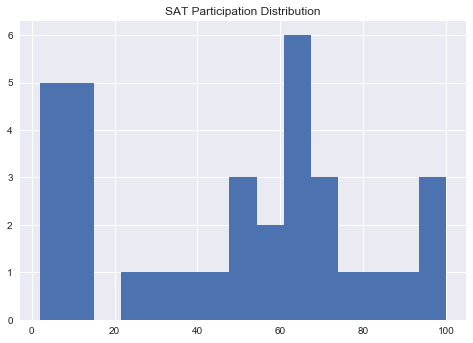

In [86]:
plt.hist(sat_partic["index"], bins = 15)
plt.title("SAT Participation Distribution") 
plt.show()

On the SAT there are a number of states with 100% participation, indicating it is part of that state's high school graduation requirements.<br>

In states where there is a particular low participation rate, it is possible that the dominant exam in that state is the ACT.

In [87]:
act_partic = pd.DataFrame(num_sat_act["partic-act"].value_counts())
act_partic.reset_index(inplace = True)

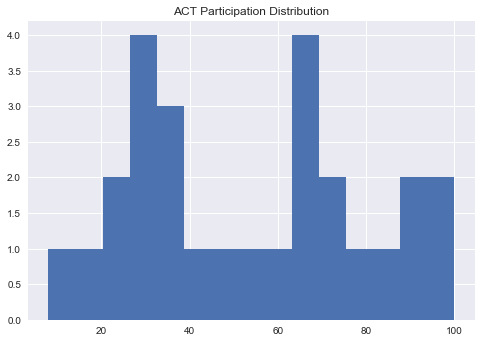

In [88]:
plt.hist(act_partic["index"], bins = 15)
plt.title("ACT Participation Distribution") 
plt.show()

On the ACT there are a number of states with 100% participation, indicating it is part of that state's high school graduation requirements.<br>

In states where there is a particular low participation rate, it is possible that the dominant exam in that state is the SAT.<br>

More states require the ACT for graduation than require the SAT.

##### 17. Plot the Math(s) distributions from both data sets.

#### ACT Math Scores

In [89]:
act_math = pd.DataFrame(num_sat_act["math-act"].value_counts())

In [90]:
act_math.reset_index(inplace = True)

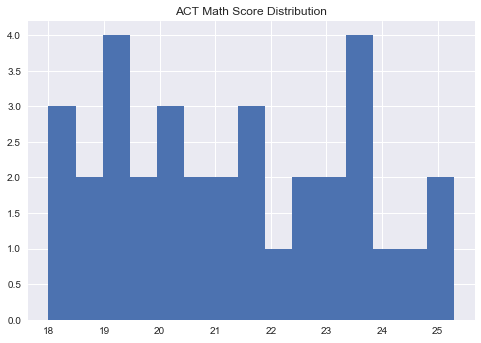

In [91]:
plt.hist(act_math["index"], bins = 15)
plt.title("ACT Math Score Distribution") 
plt.show()

#### SAT Math Scores

In [92]:
sat_math = pd.DataFrame(num_sat_act["math-sat"].value_counts())

In [93]:
sat_math.reset_index(inplace = True)

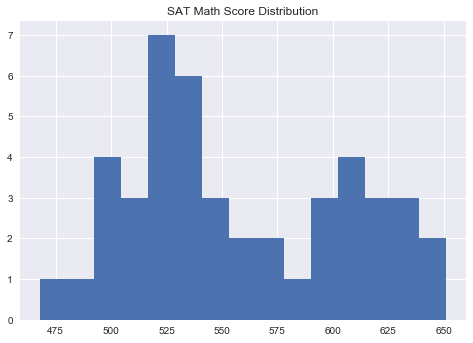

In [94]:
plt.hist(sat_math["index"], bins = 15)
plt.title("SAT Math Score Distribution")
plt.show()

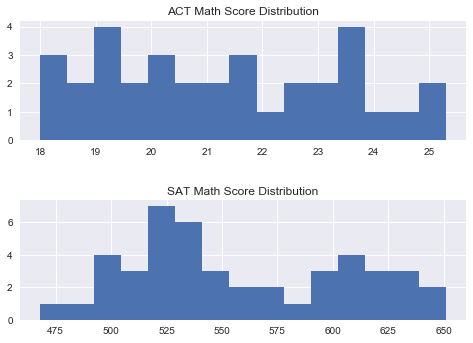

In [95]:
plt.figure(1)
plt.subplot(211)
plt.hist(act_math["index"], bins = 15)
plt.title("ACT Math Score Distribution") 

plt.subplot(212)
plt.hist(sat_math["index"], bins = 15)
plt.title("SAT Math Score Distribution")

fig = plt.gcf()
fig.subplots_adjust(hspace = 0.5)
plt.show()

##### 18. Plot the Verbal distributions from both data sets.

#### ACT Verbal

In [96]:
act_read = pd.DataFrame(num_sat_act["read-act"].value_counts())
act_read.reset_index(inplace = True)

In [97]:
act_eng = pd.DataFrame(num_sat_act["eng-act"].value_counts())
act_eng.reset_index(inplace=True)

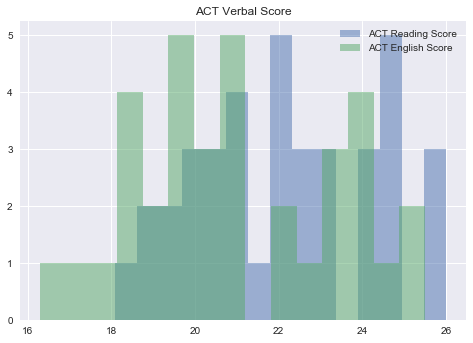

In [98]:
x = act_read["index"]
y = act_eng["index"]

bins = 15

plt.hist(x, bins, alpha=0.5, label='ACT Reading Score')
plt.hist(y, bins, alpha=0.5, label='ACT English Score')
plt.legend(loc='upper right')
plt.title("ACT Verbal Score")
plt.show()

I plotted ACT Reading and ACT English over one another because I wanted to considering how similar they were to one another and dually how similar they were to the distribution of the SAT Verbal section.

#### SAT Verbal

In [99]:
sat_verb = pd.DataFrame(num_sat_act['readwrite-sat'].value_counts())
sat_verb.reset_index(inplace=True)

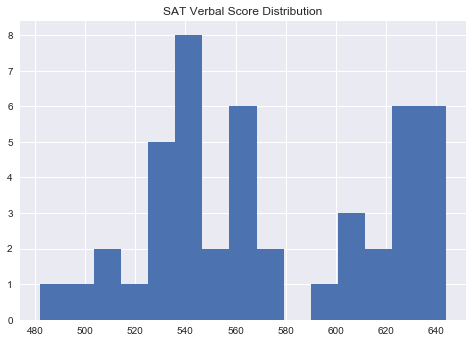

In [100]:
plt.hist(sat_verb["index"], bins = 15)
plt.title("SAT Verbal Score Distribution")
plt.show()

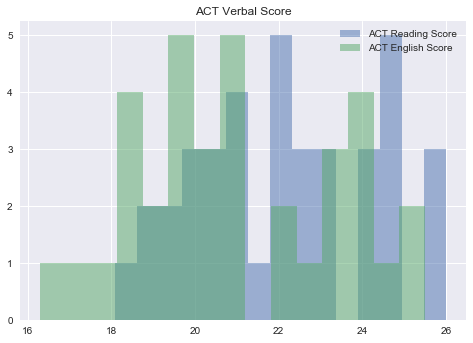

In [101]:
x = act_read["index"]
y = act_eng["index"]

bins = 15

plt.hist(x, bins, alpha=0.5, label='ACT Reading Score')
plt.hist(y, bins, alpha=0.5, label='ACT English Score')
plt.legend(loc='upper right')
plt.title("ACT Verbal Score")
plt.show()

ACT English scores show a histogram more similar to the SAT Verbal scores

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Many times we assume that the distribution is normally distributed. We can do so because of the Central Limit Theorem.

##### 20. Does this assumption hold true for any of our columns? Which?

Judging by the histograms, none of our columns are normally distributed.

##### 21. Plot some scatterplots examining relationships between all variables.

In [102]:
num_sat_act.columns

Index(['state', 'partic-act', 'eng-act', 'math-act', 'read-act', 'sci-act',
       'comp-act', 'score-range-act', 'partic-sat', 'readwrite-sat',
       'math-sat', 'total-sat', 'score-range-sat'],
      dtype='object')

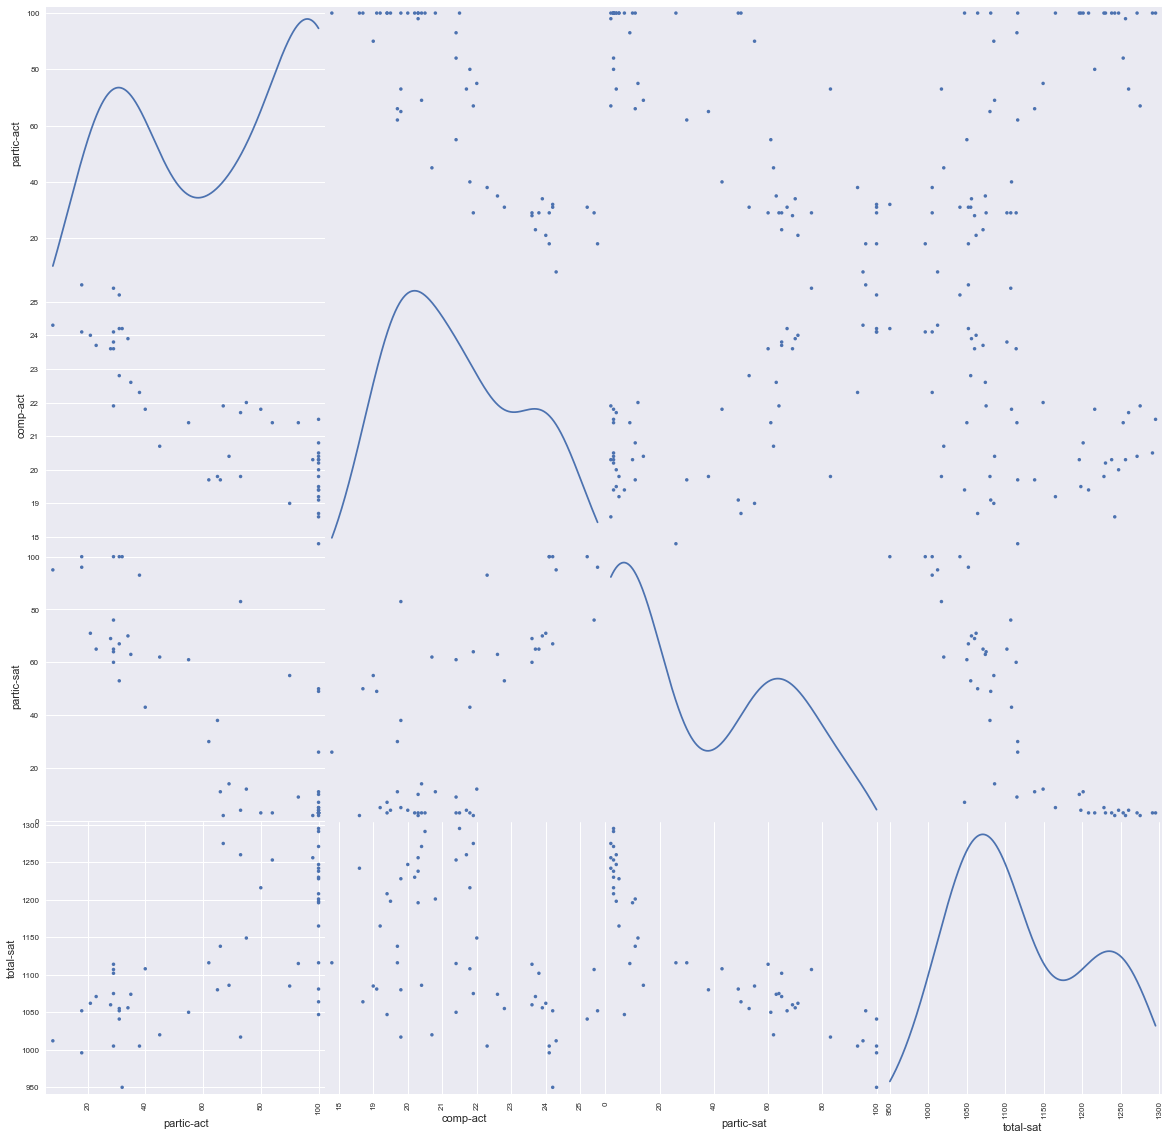

In [103]:
plt.rcParams['figure.figsize'] =(20,20)
pd.plotting.scatter_matrix(num_sat_act[["partic-act", "comp-act", "partic-sat","total-sat"]], alpha = 1, diagonal ='kde')
plt.show()

That was a great way to see a bunch of scatters at once, but for clarity, we will look at a few of them individually.

In [104]:
len((list(enumerate(num_sat_act["state"]))))

51

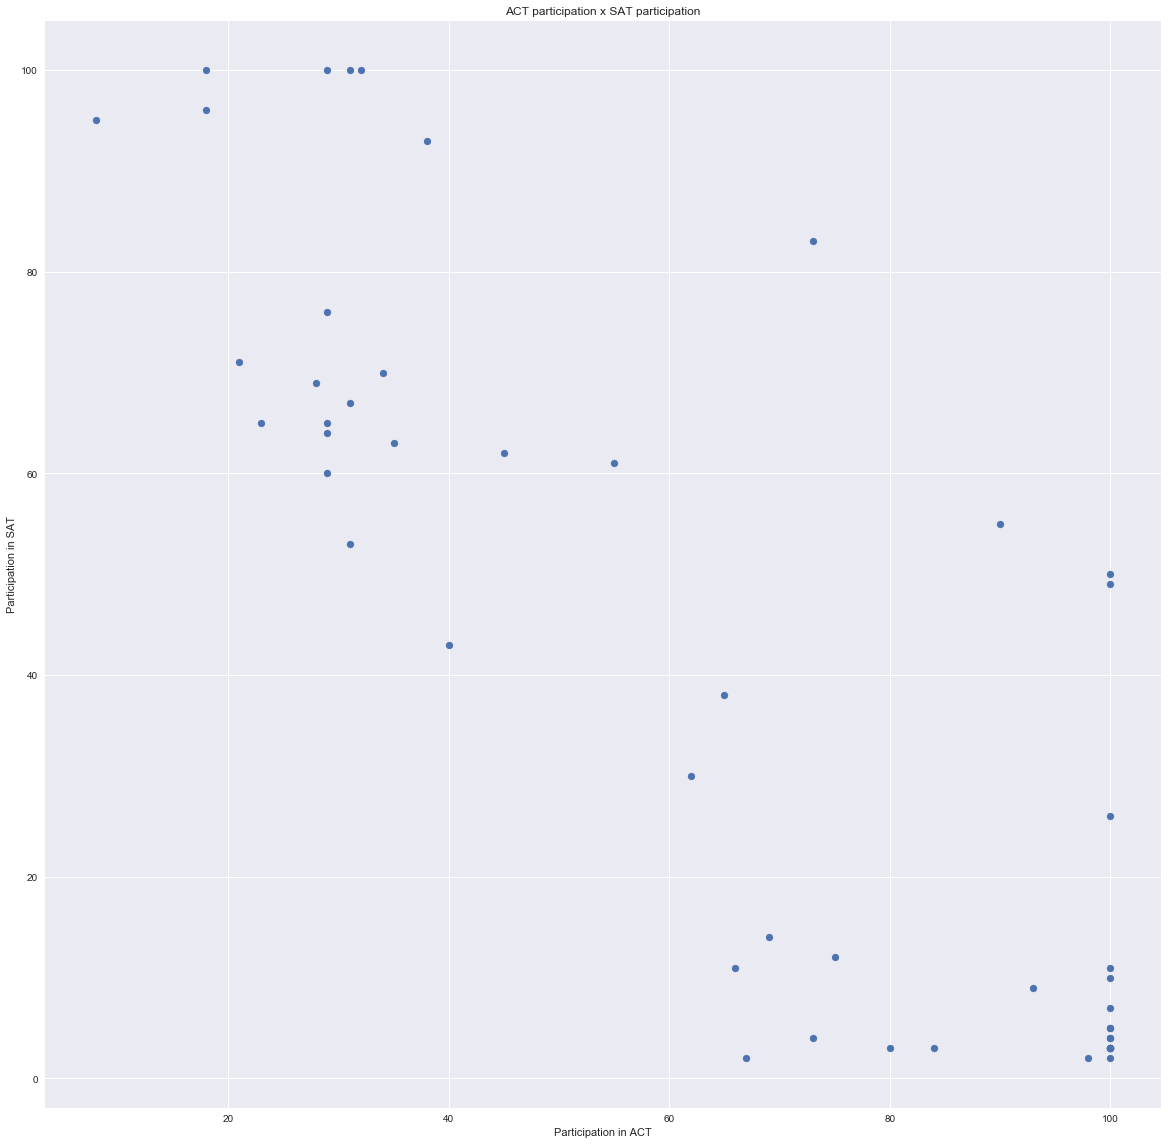

In [105]:
fig, ax = plt.subplots()
y = num_sat_act["partic-act"]
z = num_sat_act['partic-sat']
ax.scatter(y, z)
plt.ylabel('Participation in SAT')
plt.xlabel('Participation in ACT')
plt.title("ACT participation x SAT participation")
    
plt.show()

Here we see that exam participation rates have an inverse relationship. For example, the higher the participation in the SAT, the lower the participation in the ACT. These variables are negatively correlated. We can conclude that this confirms an either/or relationship many High School seniors have towards the ACT and SAT.

Except in Florida. With a wopping 73% participation on the ACT and 83% on the SAT.

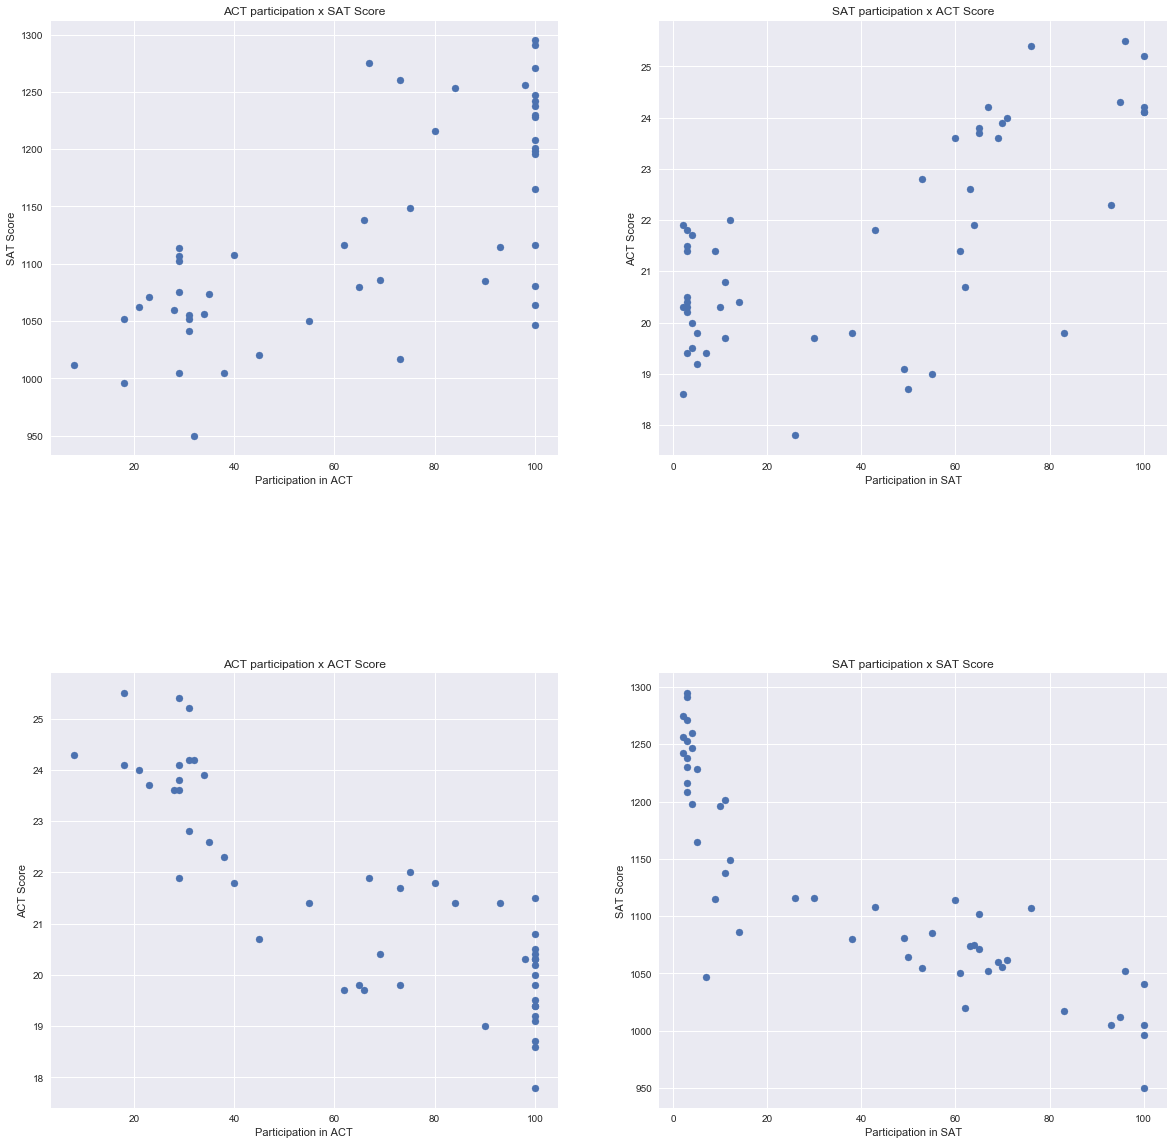

In [106]:
plt.figure()

plt.subplot(221) #2 rows, cols, plot
plt.scatter(num_sat_act["partic-act"], num_sat_act["total-sat"])
plt.ylabel('SAT Score')
plt.xlabel('Participation in ACT')
plt.title("ACT participation x SAT Score")

plt.subplot(222) #2 rows, col, plot
plt.scatter(num_sat_act["partic-sat"], num_sat_act["comp-act"])
plt.ylabel('ACT Score')
plt.xlabel('Participation in SAT')
plt.title("SAT participation x ACT Score")


plt.subplot(224) #2 rows, col, plot
plt.scatter(num_sat_act["partic-sat"], num_sat_act["total-sat"])
plt.ylabel('SAT Score')
plt.xlabel('Participation in SAT')
plt.title("SAT participation x SAT Score")


plt.subplot(223) #2 rows, col, plot
plt.scatter(num_sat_act["partic-act"], num_sat_act["comp-act"])
plt.ylabel('ACT Score')
plt.xlabel('Participation in ACT')
plt.title("ACT participation x ACT Score")

fig = plt.gcf()
fig.subplots_adjust(hspace = 0.5)

plt.show()

We know the higher the participation rate for a particular exam indicates a lower total average score. 

Here we see that in general, ACT participation rate and SAT Score are directly related. This could be because where the ACT is required to graduate from high school, only the best exam takers will opt to take the SAT. This confirms an either/or approach taken by exam takers.

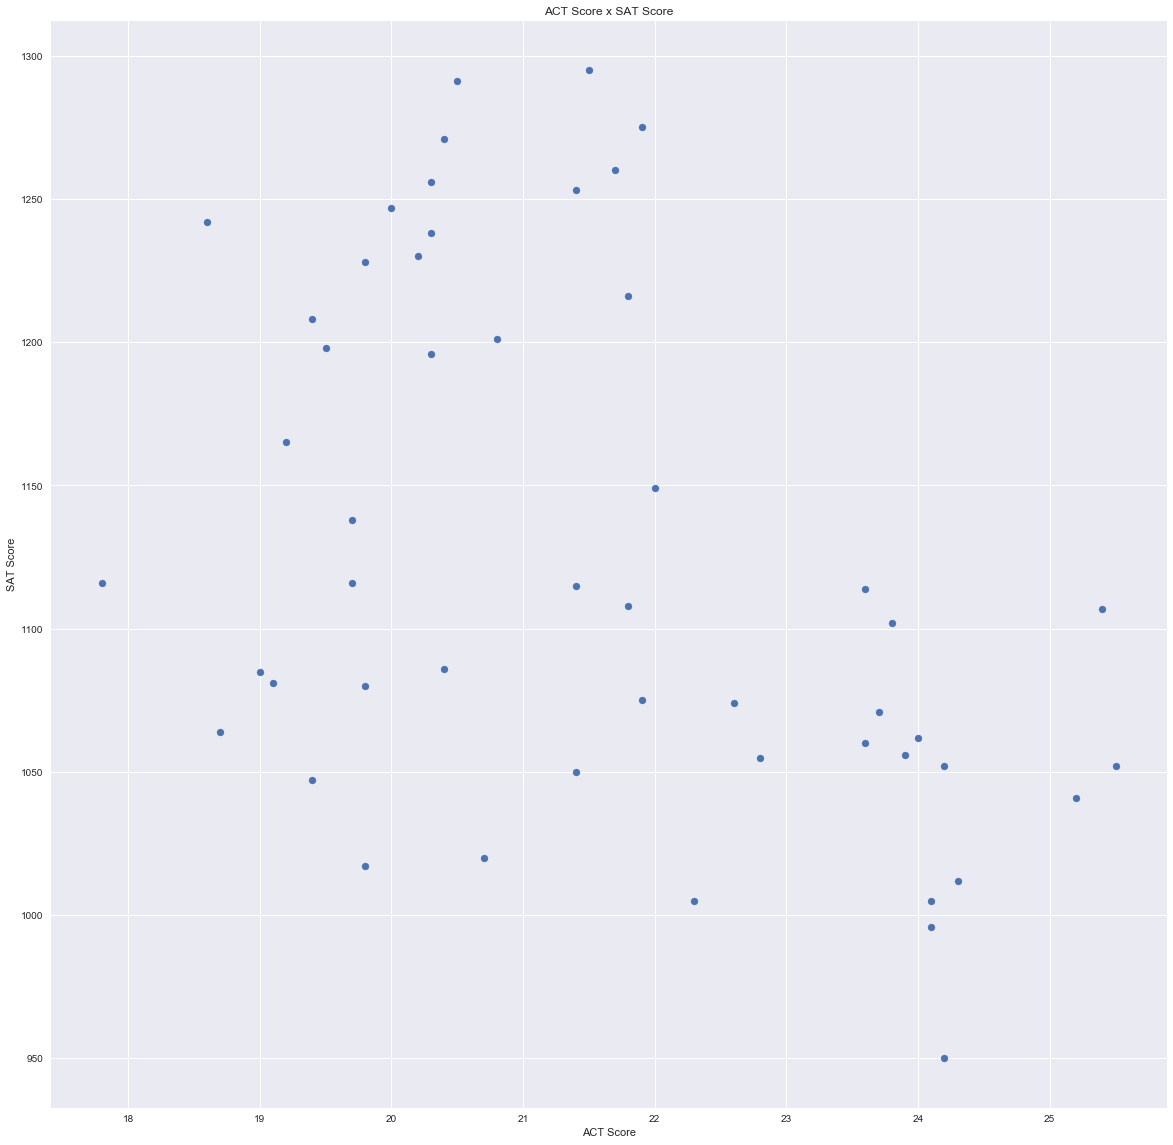

In [107]:
plt.scatter(num_sat_act["comp-act"], num_sat_act["total-sat"])
plt.ylabel('SAT Score')
plt.xlabel('ACT Score')
plt.title("ACT Score x SAT Score")
plt.show()

In [108]:
np.corrcoef(num_sat_act["total-sat"],num_sat_act["comp-act"])

array([[ 1.        , -0.44502019],
       [-0.44502019,  1.        ]])

Here we see that there is a loose, inverse relationship between SAT and ACT scores. This relationship is not as strong because states that require a specific exam as a highschool diploma pre-requisite are being compared to states where only college bound seniors elect to take it. The correlation between ACT and SAT scores weakens when comparing whole population scores versus self selecting samples. 

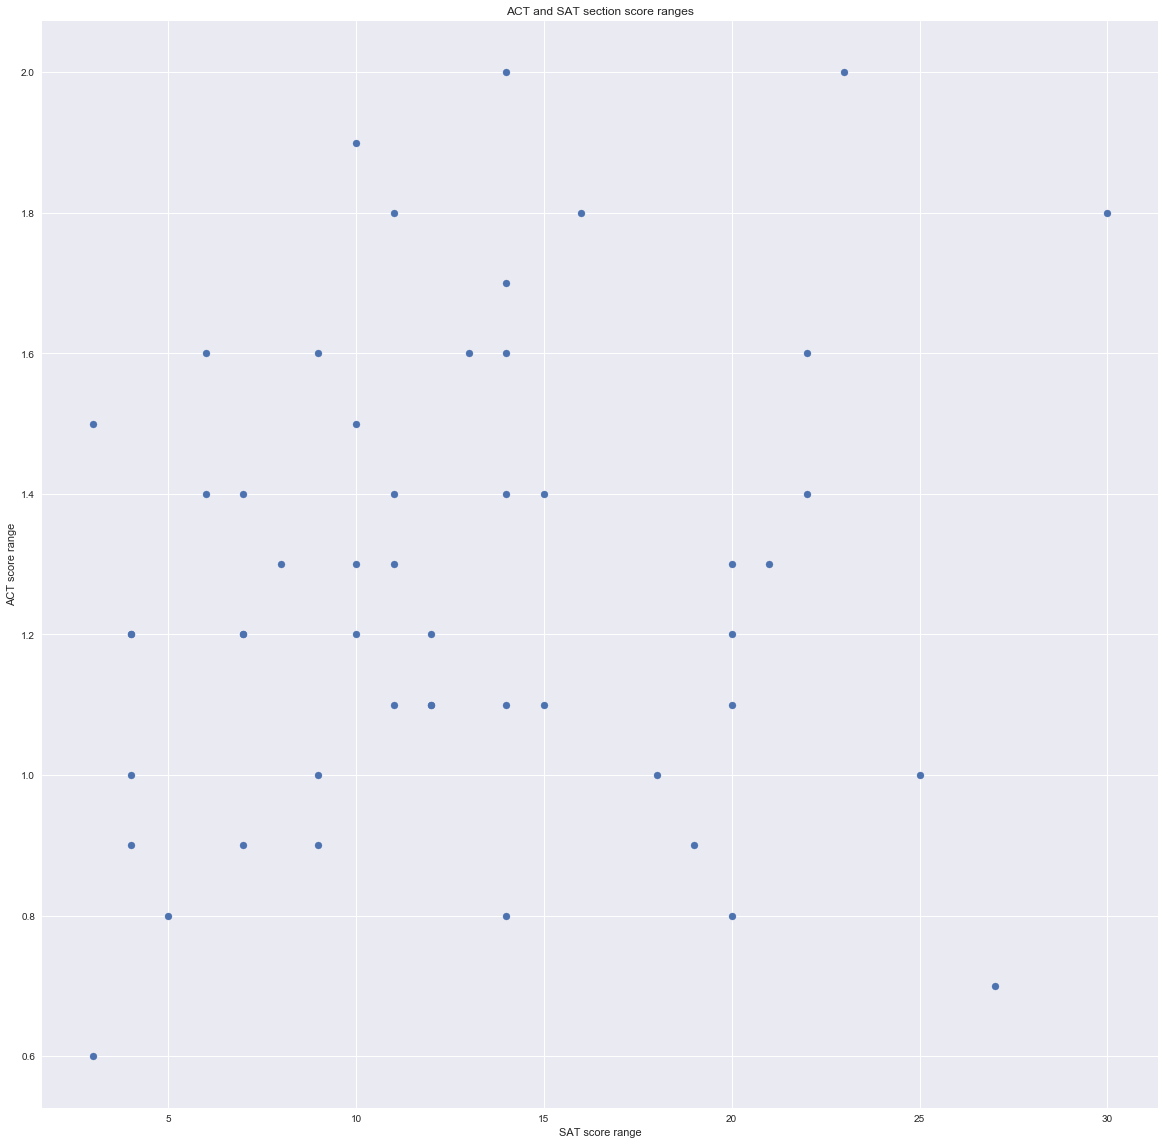

In [109]:
plt.scatter(num_sat_act["score-range-sat"], num_sat_act["score-range-act"])
plt.ylabel('ACT score range')
plt.xlabel('SAT score range')
plt.title("ACT and SAT section score ranges")
plt.show()

This was just for fun. I wanted to observe the relationship between ACT section score range and SAT section score range. Is it more likely that exam takers will have a higher range between sections on the SAT or ACT even though they are ostensibly over similar topics? Our graph indicates not really.

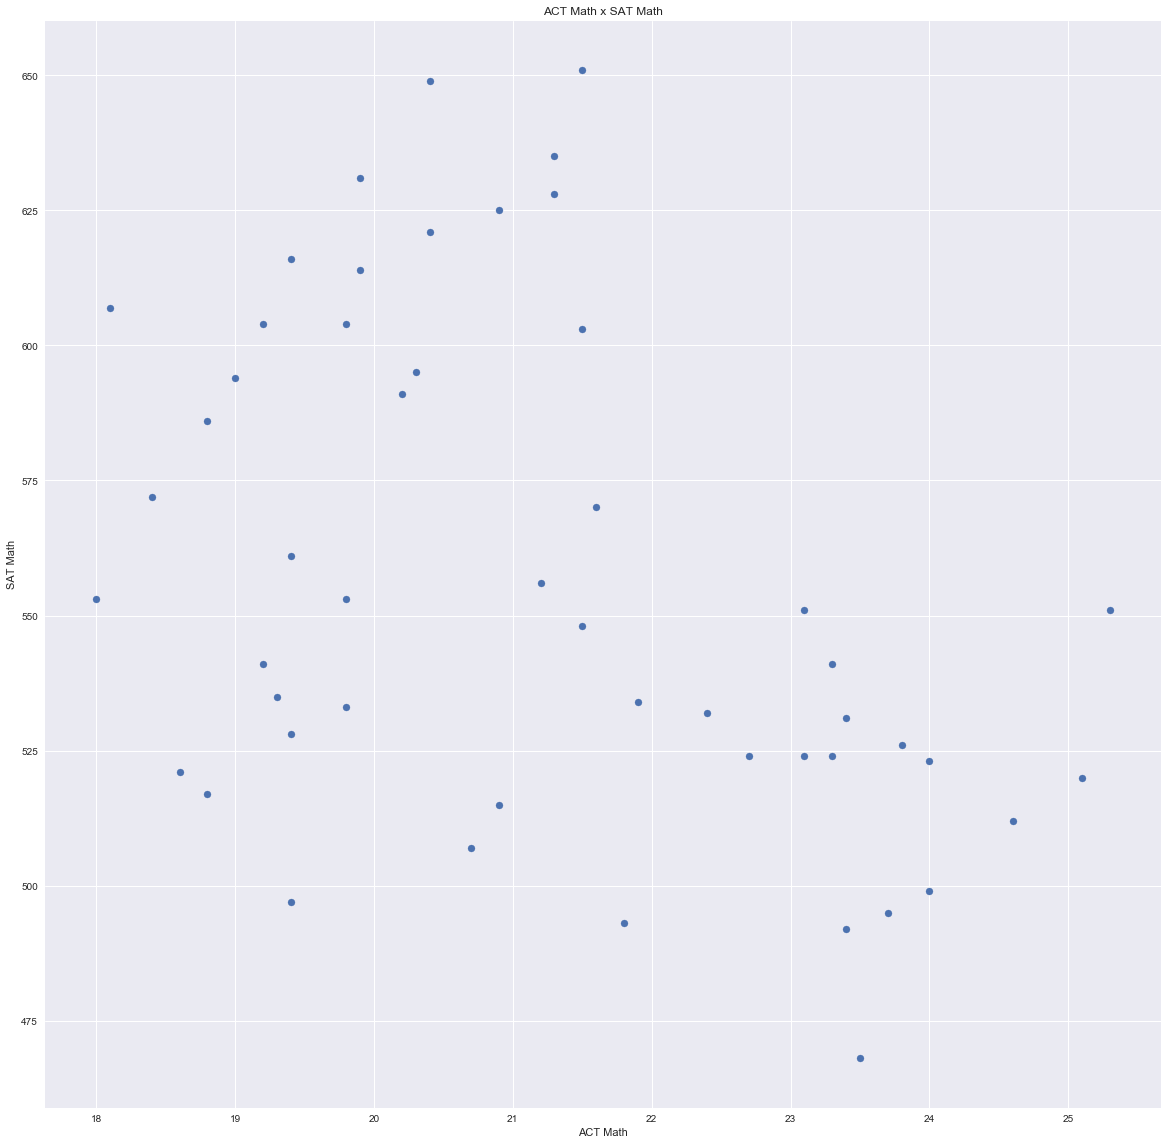

In [110]:
plt.scatter(num_sat_act["math-act"], num_sat_act["math-sat"])
plt.ylabel('SAT Math')
plt.xlabel('ACT Math')
plt.title("ACT Math x SAT Math")
plt.show()

In [111]:
np.corrcoef(num_sat_act["math-sat"],num_sat_act["math-act"])

array([[ 1.        , -0.42045604],
       [-0.42045604,  1.        ]])

In [112]:
#No correlation.

##### 22. Are there any interesting relationships to note?

A lot of the relationships can be summarized by the inverse relationship between participation rate and composite score. For example, the higher the participation rate for an exam, the lower the scores for that particular exam.

Exam participation rates also have an inverse relationship. For example, the higher the participation rate for one exame indicates a lower participation rate on the other.

I found it interesting that the ACT composite and SAT total scores are not directly correlated. I suspect this arises from states requiring one or the other for high school graduation while the other is optional. The exam that is required will have lower overall scores and the one that is elective will have higher scores.

##### 23. Create box plots for each variable. 

In [113]:
x = num_sat_act[["partic-act", "comp-act", "partic-sat","total-sat"]]

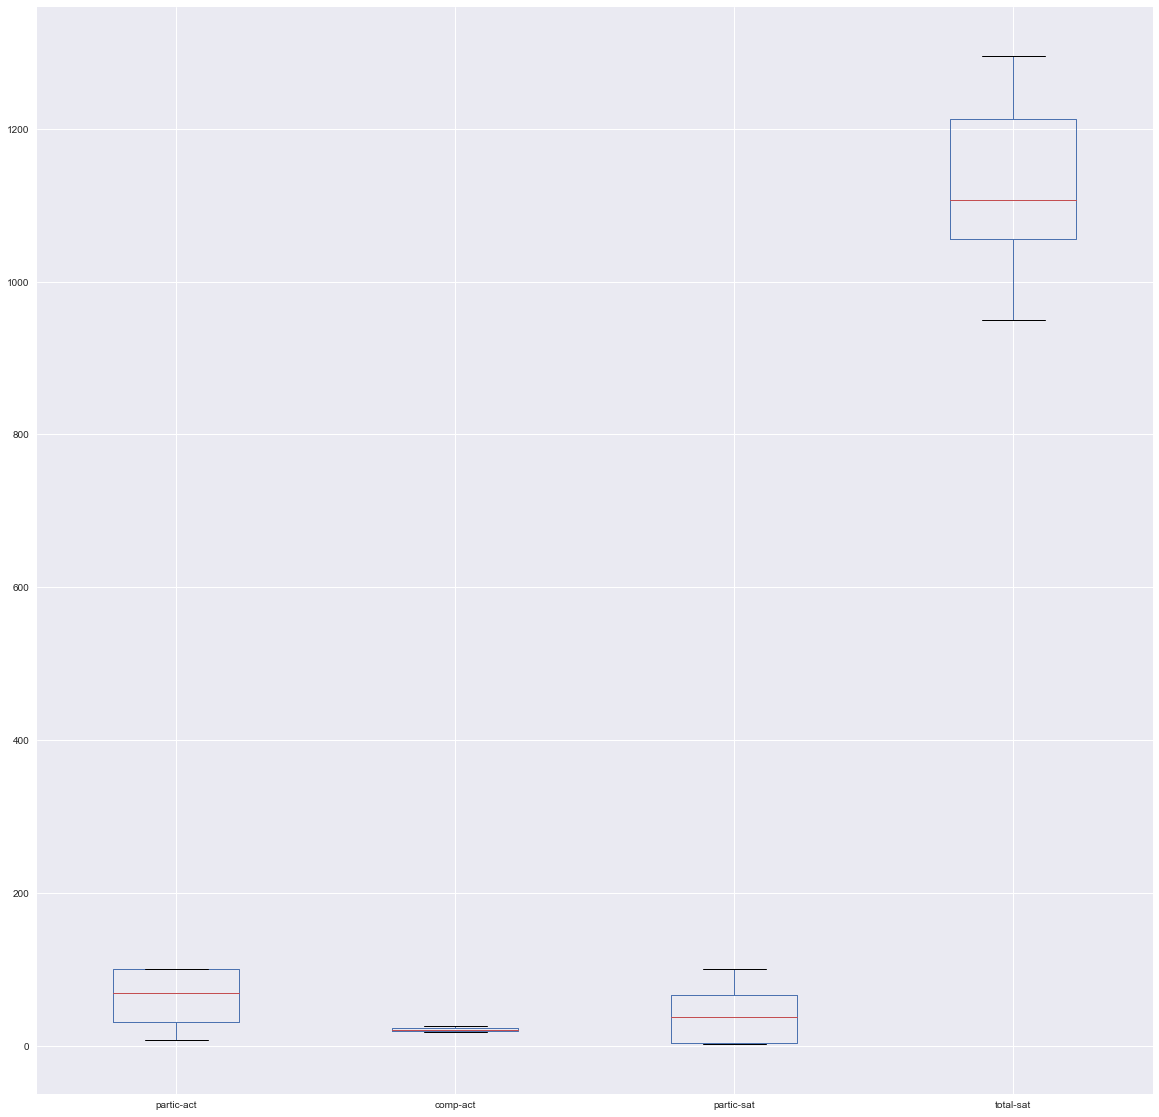

In [114]:
x.plot.box()
plt.show()

We see that ACT composites do not vary as much as the other columns evaluated do. This is because the ACT score has a maximum of 25.5 and minimum of 17.8. This is a range of 7.7 which is miniscule when scaled next to the ranges of other variables.

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [115]:
heat_map = num_sat_act.loc[:,["state","partic-sat","partic-act"]]
heat_map["dom-exam"] = heat_map.apply(lambda x: x["partic-sat"]>x['partic-act'], axis =1)
heat_map.to_csv("../data/sat_act_data.csv",index = False)

In [116]:
%%HTML
<div class='tableauPlaceholder' id='viz1507263529905' style='position: relative'><noscript><a href='#'><img alt='Exam Dominance ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SATACTdominance&#47;ExamDominance&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='2' /> <param name='site_root' value='' /><param name='name' value='SATACTdominance&#47;ExamDominance' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SATACTdominance&#47;ExamDominance&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1507263529905');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Heatmap of the 30 open states:

In [117]:
heat_map2 = num_sat_act.loc[:,["state","partic-sat","partic-act"]]

In [118]:
heat_map2["open"] = heat_map.apply(lambda x: ((x["partic-sat"]!=100)&(x['partic-act']!=100)), axis =1)
heat_map2.to_csv("../data/sat_act_open_states.csv",index = False)                                   

In [119]:
%%HTML
<div class='tableauPlaceholder' id='viz1507272906441' style='position: relative'><noscript><a href='#'><img alt='Open States ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PN&#47;PNFSRPBXX&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='2' /> <param name='path' value='shared&#47;PNFSRPBXX' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PN&#47;PNFSRPBXX&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1507272906441');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

Data scientists care about the following things
- <u>center:</u> mean, median, mode
- <u>spread:</u> standard deviation, variance, range
- <u>shape:</u> skew, symmetric <Br>

I will proceed to describe the distributions of SAT score, SAT participation, ACT score and ACT participation using the aforementioned descriptors. 

### SAT Score and Participation

As a refresher here is what distributions look like:

In [120]:
act_total = pd.DataFrame(num_sat_act["comp-act"].value_counts())
act_total.reset_index(inplace = True)

sat_total = pd.DataFrame(num_sat_act["total-sat"].value_counts())
sat_total.reset_index(inplace = True)

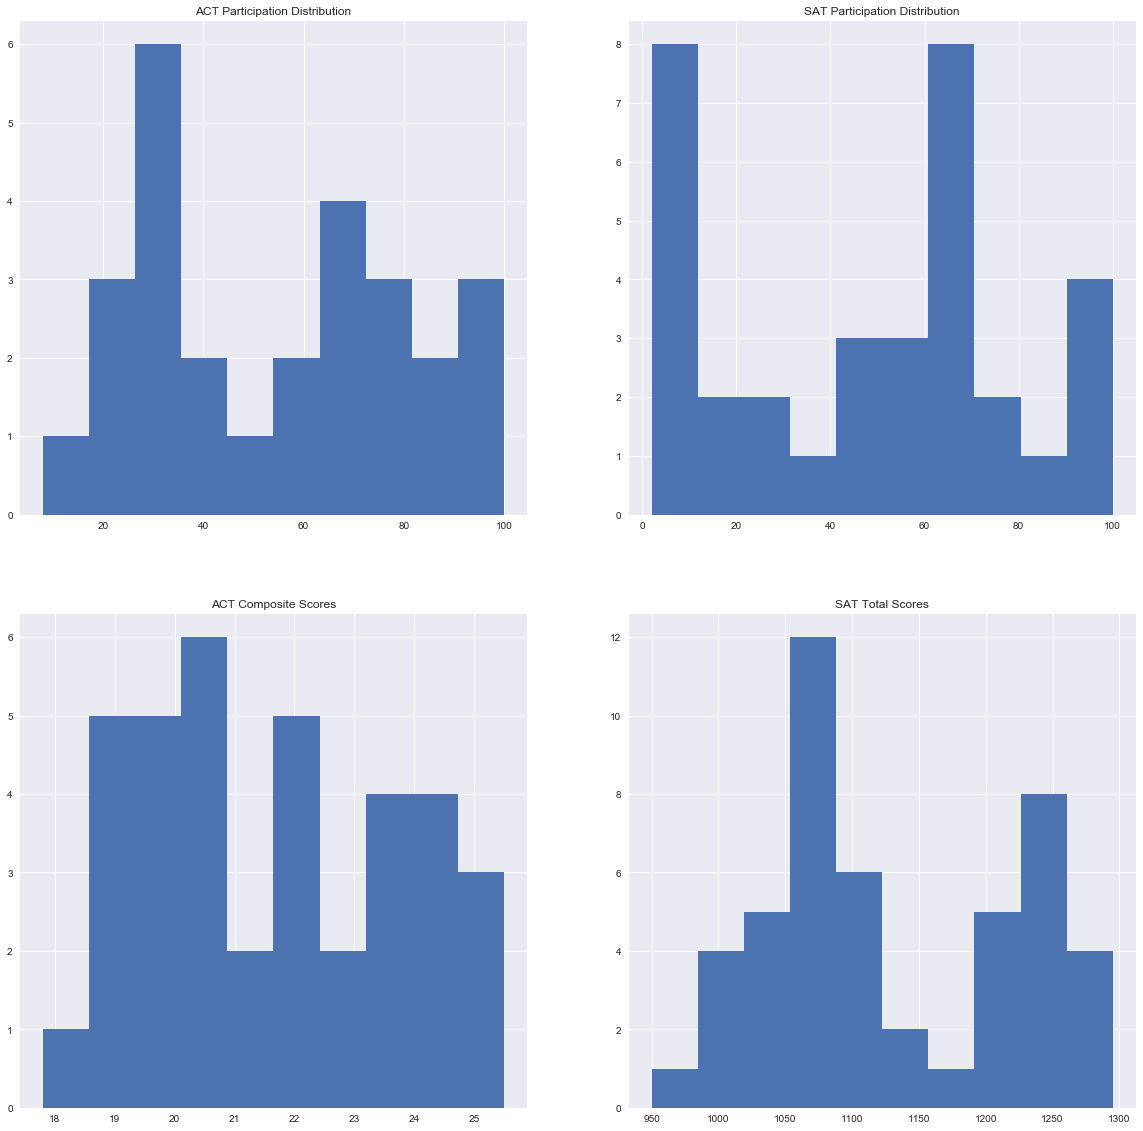

In [121]:
plt.subplot(221)
plt.hist(act_partic["index"], bins = 10)
plt.title("ACT Participation Distribution") 

plt.subplot(222)
plt.hist(sat_partic["index"], bins = 10)
plt.title("SAT Participation Distribution") 

plt.subplot(223)
plt.hist(act_total["index"], bins = 10)
plt.title("ACT Composite Scores") 

plt.subplot(224)
plt.hist(sat_total["index"], bins = 10)
plt.title("SAT Total Scores") 
plt.show()

In [122]:
from scipy import stats

In [123]:
def describe_dists(variable = ["comp-act", "total-sat", "partic-act", "partic-sat"]):
    x = str(variable)
    a_dict = {"comp-act":"ACT Score",
             "total-sat": "SAT Score",
             "partic-act": "ACT Participation",
             "partic-sat":"SAT Participation"}
    print ("Characteristics about "+a_dict[x]+" CENTER:")
    print ("Mean: "+str(np.mean(num_sat_act[variable])))
    print ("Median: "+str(np.median(num_sat_act[variable])))
    try:
        print ("Mode: "+str(mode(num_sat_act[variable])))
    except:
        pass
    print(" ")
    print ("Characteristics about "+a_dict[x]+" SPREAD:")
    print ("Standard Deviation: "+str(np.std(num_sat_act[variable])))
    print ("Variance: "+str(np.var(num_sat_act[variable])))
    print ("Range: "+str(np.ptp(num_sat_act[variable])))
    print(" ")
    print ("Characteristics about "+a_dict[x]+" SHAPE:")
    print ("Skewness: "+str(stats.skew(num_sat_act[variable])))

In [124]:
describe_dists("comp-act")

Characteristics about ACT Score CENTER:
Mean: 21.519607843137255
Median: 21.4
 
Characteristics about ACT Score SPREAD:
Standard Deviation: 2.000786081581989
Variance: 4.00314494425221
Range: 7.7
 
Characteristics about ACT Score SHAPE:
Skewness: 0.3103255637098951


In [125]:
describe_dists("total-sat")

Characteristics about SAT Score CENTER:
Mean: 1126.0980392156862
Median: 1107.0
 
Characteristics about SAT Score SPREAD:
Standard Deviation: 91.58351056778743
Variance: 8387.53940792003
Range: 345.0
 
Characteristics about SAT Score SHAPE:
Skewness: 0.30168334986069095


In [126]:
describe_dists("partic-act")

Characteristics about ACT Participation CENTER:
Mean: 65.25490196078431
Median: 69.0
Mode: 100
 
Characteristics about ACT Participation SPREAD:
Standard Deviation: 31.824175751231806
Variance: 1012.7781622452906
Range: 92
 
Characteristics about ACT Participation SHAPE:
Skewness: -0.19211796242279808


In [127]:
describe_dists("partic-sat")

Characteristics about SAT Participation CENTER:
Mean: 39.80392156862745
Median: 38.0
Mode: 3.0
 
Characteristics about SAT Participation SPREAD:
Standard Deviation: 34.92907076664508
Variance: 1220.0399846213
Range: 98.0
 
Characteristics about SAT Participation SHAPE:
Skewness: 0.33617543925343646


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

This is done above after each of the scatter plots.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

$H_0$ = there is no difference in the participation in exam A and the participation in exam B<br>
$H_A$ = there is a difference in participation in exam A and exam B

In [128]:
# First we must find a p value.
stats.ttest_ind(num_sat_act["partic-act"], num_sat_act['partic-sat'], equal_var = False)

Ttest_indResult(statistic=3.808577890817054, pvalue=0.00024238408285306908)

Based on the $p$ value, .0002, we can reject the null hypothesis. Since our t-statistic is positive, it suggests that participation in the ACT is higher than in the SAT.

##### I will also execute a hypothesis test comparing SAT and ACT participation rates in the 30 states that do not require either for high school graduation.

$H_0^2$ = there is no difference in the participation in exam A and the participation in exam B<br>
$H_A^2$ = there is a difference in participation in exam A and exam B

In [129]:
num_sat_act2 = num_sat_act[(num_sat_act["partic-act"] != 100) & (num_sat_act["partic-sat"] != 100)]

In [130]:
stats.ttest_ind(num_sat_act2["partic-act"], num_sat_act2["partic-sat"], equal_var=False)

Ttest_indResult(statistic=0.35876324889533168, pvalue=0.72112443997199516)

Based on the $p$ value, .7211244399, we fail to reject the null hypothesis. SAT still has the chance to win marketshare in the 30 open states!

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [131]:
conf_level = 0.95
mean = np.mean(num_sat_act["partic-sat"])
sigma = np.std(num_sat_act["partic-sat"])
n = len(num_sat_act["partic-sat"])

In [132]:
stats.norm.interval(conf_level, loc=mean, scale=sigma/(n ** 0.5)) ## n > 1

(30.217643220943465, 49.390199916311438)

With 95% confidence, the average state participation rate in the SAT will be between 30.217 and 49.390.

In [133]:
conf_level = 0.95
mean = np.mean(num_sat_act["partic-act"])
sigma = np.std(num_sat_act["partic-act"])
n = len(num_sat_act["partic-act"])

In [134]:
stats.norm.interval(conf_level, loc=mean, scale=sigma/(n ** 0.5)) ## n > 1

(56.520761594581103, 73.989042326987516)

With 95% confidence, the average state participation rate in the ACT will be between 56.5208 and 73.989.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

My answer to 27 was indicated by my answer to 26. I was not surprised.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

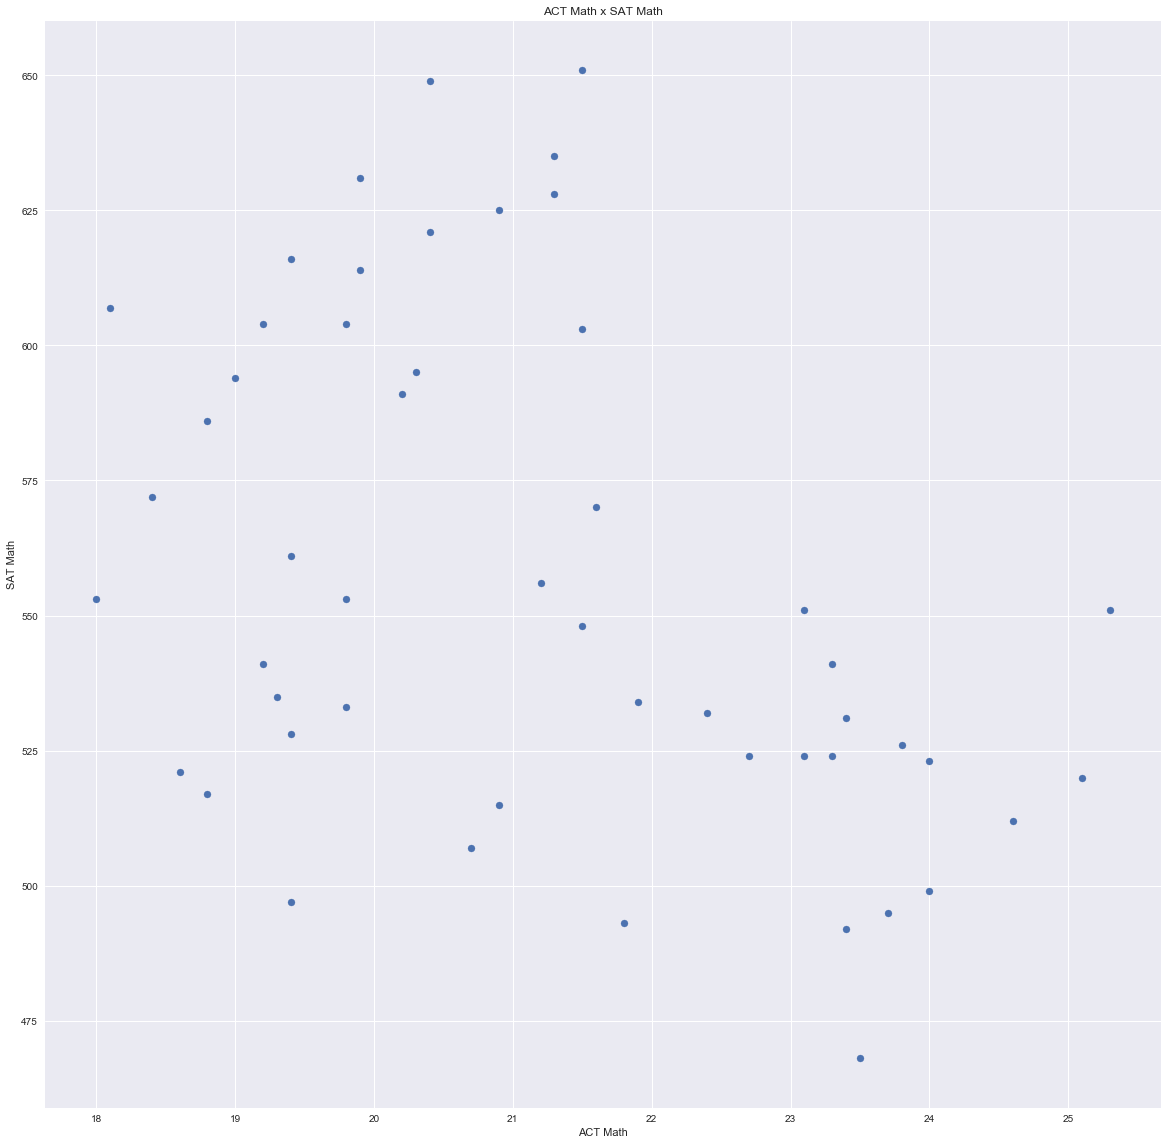

In [135]:
#recreated from above
plt.scatter(num_sat_act["math-act"], num_sat_act["math-sat"])
plt.ylabel('SAT Math')
plt.xlabel('ACT Math')
plt.title("ACT Math x SAT Math")
plt.show()

In [136]:
np.corrcoef(num_sat_act["math-sat"],num_sat_act["math-act"])

array([[ 1.        , -0.42045604],
       [-0.42045604,  1.        ]])

With correlation coefficient $-.5<|\rho| <.5$, it is not appropriate to generate correlation between math scores. This is in part because the effect participation rates have on average total score. Since we are comparing the ACT which is required in 17 states, and the SAT which is only required in 4 states, finding correlation between section scores is impossible.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

If we only seek to understand the relationship between the SAT and ACT data for 2017, it makes sense to conduct statistical inference given the data we have because we can assume by the Central Limit Theorem that each sample in a whole population will reflect the whole and converge means and standard deviation statistics. <br><br>
This isn't to say that additional context wouldn't be helpful in understanding the data from 2017. In addition to statistical inference, it would be beneficial to observe the trends of exam participation leading up to 2017 so we can fully understand how the 2017 SAT test changes affected participation in their first year.

##### NMO additional analysis: t test between SAT dominant states and ACT dominant states.
##### Given exam A is the dominant exam, is exam B still taken? Which exam (ACT or SAT) performs better as exam B?

In [137]:
heat_map.head()

,state,partic-sat,partic-act,dom-exam
1,Alabama,5.0,100,False
2,Alaska,38.0,65,False
3,Arizona,30.0,62,False
4,Arkansas,3.0,100,False
5,California,53.0,31,True


In [138]:
satdom = heat_map[heat_map["dom-exam"]==True]

In [139]:
actdom = heat_map[heat_map["dom-exam"]==False]

In [140]:
satdom["diff"] = satdom.apply(lambda x: (x["partic-sat"]-x["partic-act"]), axis =1)

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [141]:
satdom.head()

,state,partic-sat,partic-act,dom-exam,diff
5,California,53.0,31,True,22.0
7,Connecticut,100.0,31,True,69.0
8,Delaware,100.0,18,True,82.0
9,District of Columbia,100.0,32,True,68.0
10,Florida,83.0,73,True,10.0


In [142]:
actdom["diff"] = actdom.apply(lambda x: (x["partic-act"]-x["partic-sat"]), axis = 1)

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [143]:
actdom.head()

,state,partic-sat,partic-act,dom-exam,diff
1,Alabama,5.0,100,False,95.0
2,Alaska,38.0,65,False,27.0
3,Arizona,30.0,62,False,32.0
4,Arkansas,3.0,100,False,97.0
6,Colorado,11.0,100,False,89.0


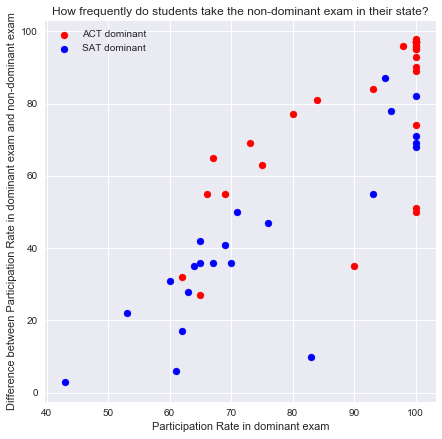

In [144]:
X1 = actdom["partic-act"]
Y1 = actdom["diff"]

X2 = satdom["partic-sat"]
Y2 = satdom["diff"]

plt.figure(figsize=(7,7))
plt.scatter(X1,Y1,color='red')
plt.scatter(X2,Y2,color='blue')
plt.legend(["ACT dominant", "SAT dominant"])
plt.title("How frequently do students take the non-dominant exam in their state?")
plt.xlabel("Participation Rate in dominant exam")
plt.ylabel("Difference between Participation Rate in dominant exam and non-dominant exam")
plt.show()

Above we see that in general, where the ACT is dominant, there are larger spreads between ACT and SAT participation rates.

Doing the t-test of means<Br>
$H_0$ = there is no difference in the difference between participation in the dominant and non-dominant exams. That is regardless of which exam is dominant, relative to the dominant exam, there are similar participation rates in the non-dominant exam.<br>
$H_A$ = there is a difference in the difference between participation rates in the dominant and non-dominant exams. That is relative to the dominant exam, the non-dominant exam for one exam type, the non-dominant exam maintains a higher participation rate than the other.<br><Br>
For example, we might find where the SAT is dominant, students still take the ACT in high numbers, however where the ACT is dominant, very few people take the SAT.

In [145]:
# First we must find a p value.
stats.ttest_ind(actdom["diff"], satdom['diff'], equal_var = False)

Ttest_indResult(statistic=5.1102862720100513, pvalue=6.9896778335714098e-06)

Based on the $p$ value, .0000006989677, we can reject the null hypothesis. Since our t-statistic is positive, it suggests that even when the SAT is the dominant exam in the market, substantial numbers still take the ACT. The opposite does not hold true.